<a href="https://colab.research.google.com/github/adichat08/Support-Vector-Classifier-for-Predicting-Survival-Likelihood-of-Hepatitis-Patients/blob/main/Data_Cleaning_and_Encoding_Categoricals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning and Encoding Categoricals

In this section, missing values in the data will be filled/removed based on trends seen between the column with the missing values and the target variable. Additionally, the categorical columns will be encoded using One-Hot encoding.

In [ ]:
# function to impute missing values in categorical columns
# It takes the DataFrame and the target variable column as inputs,
# then replaces the missing values in each of the categorical columns
# by observing the general trend between the values of that column
# and the target.
def cat_sub(df,target):
  import matplotlib.pyplot as plt
  import seaborn as sns
  global columns
  columns = []
  for i in df:
    if len(df[i].unique())==3:
      columns.append(i)
  heights_lst = []
  for a in columns:
    for b in sns.countplot(df[a],hue=df[target]).patches:
      heights_lst.append(b.get_height())
    if (heights_lst[2]/heights_lst[0])<(heights_lst[3]/heights_lst[1]):
       for i in columns:
        feature_lst = df[i]
        target_lst = df[target]
        for j in range(len(df)):
          if (target_lst[j]==1) and (np.isnan(df[i][j])==True):
            feature_lst[j]=1
          elif (target_lst[j]==2) and (np.isnan(df[i][j])==True):
            feature_lst[j]=2
        df[i]=feature_lst
    elif (heights_lst[2]/heights_lst[0])>(heights_lst[3]/heights_lst[1]):
       for i in columns:
         feature_lst = df[i]
         target_lst = df[target]
         for j in range(len(df)):
           if (target_lst[j]==1) and (np.isnan(df[i][j])==True):
             feature_lst[j]=2
           elif (target_lst[j]==2) and (np.isnan(df[i][j])==True):
             feature_lst[j]=1
         df[i]=feature_lst

In [ ]:
# function to impute missing values in the columns holding continuous data
# It first seperates the entire DataFrame based on the groups in target variable(the different classes)
# Then, it finds the median of the values belonging to a particular atttribute for both the groups
# in the target variable
# Finally, it looks at the value in the target column of the row holding the missing value to be replaced
# and substitutes the median of the values belonging to that particular column and target class.
def num_median_sub(df,target):
  global num_columns
  num_columns = []
  for i in df:
    if len(df[i].unique())>3:
      num_columns.append(i)
  for j in num_columns:
    feature_lived = []
    for x in df[df[target]==2][j]:
      feature_lived.append(float(x))

    feature_died = []
    for x in df[df[target]==1][j]:
      feature_died.append(float(x))

    feature_lst = df[j]
    for y in range(len(df)):
      if (df[target][y]==1) and (np.isnan(df[j][y])==True):
        feature_lst[y]=np.nanmedian(feature_died)
      elif (df[target][y]==2) and (np.isnan(df[j][y])==True):
        feature_lst[y]=np.nanmedian(feature_lived)
    df[j]=feature_lst
  return df

In [ ]:
# function to drop rows and columns that don't meet a certain threshold of non-null values.
def dropper(df):
  df.dropna(axis=1,thresh=100,inplace=True)
  df.dropna(axis=0,thresh=16,inplace=True)
  df.reset_index(inplace=True)
  df.drop(labels='index',axis=1,inplace=True)
  return df

In [ ]:
# checking for null values in every column
hepatitis_data.isnull().sum()

Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER BIG          10
LIVER FIRM         11
SPLEEN PALPABLE     5
SPIDERS             5
ASCITES             5
VARICES             5
BILIRUBIN           6
ALK PHOSPHATE      29
SGOT                4
ALBUMIN            16
PROTIME            67
HISTOLOGY           0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the 

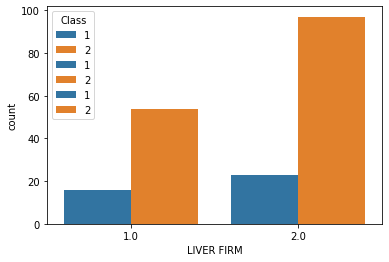

In [ ]:
# applying the above functions to clean the data
dropper(hepatitis_data)
cat_sub(hepatitis_data,'Class')
num_median_sub(hepatitis_data,'Class')

# applying One-Hot encoding on the categorical columns
hepatitis_data = pd.get_dummies(hepatitis_data,columns=['SEX','STEROID','ANTIVIRALS','FATIGUE',
                                                        'MALAISE','ANOREXIA','LIVER BIG','LIVER FIRM','SPLEEN PALPABLE','SPIDERS','ASCITES','VARICES','HISTOLOGY'])

In [ ]:
# checking for null values in every column after cleaning and encoding.
hepatitis_data.isnull().sum()

Class                  0
AGE                    0
BILIRUBIN              0
ALK PHOSPHATE          0
SGOT                   0
ALBUMIN                0
SEX_1                  0
SEX_2                  0
STEROID_1.0            0
STEROID_2.0            0
ANTIVIRALS_1           0
ANTIVIRALS_2           0
FATIGUE_1.0            0
FATIGUE_2.0            0
MALAISE_1.0            0
MALAISE_2.0            0
ANOREXIA_1.0           0
ANOREXIA_2.0           0
LIVER BIG_1.0          0
LIVER BIG_2.0          0
LIVER FIRM_1.0         0
LIVER FIRM_2.0         0
SPLEEN PALPABLE_1.0    0
SPLEEN PALPABLE_2.0    0
SPIDERS_1.0            0
SPIDERS_2.0            0
ASCITES_1.0            0
ASCITES_2.0            0
VARICES_1.0            0
VARICES_2.0            0
HISTOLOGY_1            0
HISTOLOGY_2            0
dtype: int64

In [ ]:
hepatitis_data

,Class,AGE,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,SEX_1,SEX_2,STEROID_1.0,STEROID_2.0,...,SPLEEN PALPABLE_1.0,SPLEEN PALPABLE_2.0,SPIDERS_1.0,SPIDERS_2.0,ASCITES_1.0,ASCITES_2.0,VARICES_1.0,VARICES_2.0,HISTOLOGY_1,HISTOLOGY_2
0,2,30,1.0,85.0,18.0,4.0,0,1,1,0,...,0,1,0,1,0,1,0,1,1,0
1,2,50,0.9,135.0,42.0,3.5,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0
2,2,78,0.7,96.0,32.0,4.0,1,0,0,1,...,0,1,0,1,0,1,0,1,1,0
3,2,31,0.7,46.0,52.0,4.0,1,0,0,1,...,0,1,0,1,0,1,0,1,1,0
4,2,34,1.0,85.0,200.0,4.0,1,0,0,1,...,0,1,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,1,46,7.6,118.0,242.0,3.3,1,0,0,1,...,0,1,1,0,1,0,1,0,0,1
143,2,44,0.9,126.0,142.0,4.3,1,0,0,1,...,0,1,0,1,0,1,0,1,0,1
144,2,61,0.8,75.0,20.0,4.1,1,0,1,0,...,0,1,1,0,0,1,0,1,0,1
145,2,53,1.5,81.0,19.0,4.1,0,1,1,0,...,1,0,1,0,0,1,1,0,0,1


As one can see in the outputs of the last two code cells, there are no missing values present in any of the columns and the categorical variables have been encoded.